In [1]:
# importing libs

import pandas as pd
from datetime import datetime
import numpy as np  # for numerical computations like log,exp,sqrt etc
import pandas as pd  # for reading & storing data, pre-processing
import matplotlib.pylab as plt  # for visualization
# for making sure matplotlib plots are generated in Jupyter notebook itself
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
from matplotlib import pyplot
import numpy as np, pandas as pd
import matplotlib as mpl, seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import xlrd


In [2]:
# Reading files
weather_df = pd.read_csv("data/Weather.csv", index_col="time", parse_dates=True)
CropParameters = pd.read_csv("data/AICU/CropParameters.csv", index_col="Time", parse_dates=True)
GrodanSens = pd.read_csv("data/AICU/GrodanSens.csv", index_col="time", parse_dates=True)
LabAnalysis = pd.read_csv("data/AICU/LabAnalysis.csv", index_col="Time", parse_dates=True)
Production = pd.read_csv("data/AICU/Production.csv", index_col="time", parse_dates=True)
TomQuality = pd.read_csv("data/AICU/TomQuality.csv", index_col="time", parse_dates=True)
Resources = pd.read_csv("data/AICU/Resources.csv", index_col="Time ", parse_dates=True)

GreenhouseClimate = pd.read_csv("data/AICU/GreenhouseClimate.csv", squeeze=True, parse_dates=True)




In [13]:

df = GreenhouseClimate
############################################################

# Dealing with missing values 


# bick filling the T air column 
df["Tair"] = df["Tair"].fillna(method="ffill") 

print(df.isnull().mean() * 100)
# Removing columns with  more than 50 % nan
df = df.dropna(thresh=df.shape[0]*0.4,how='all',axis=1)

df.fillna(method="bfill")
print(df.isnull().mean() * 100)


time                           0.000000
AssimLight                     0.000000
BlackScr                       0.000000
CO2air                         0.000000
Cum_irr                        0.000000
EC_drain_PC                    0.000000
EnScr                          0.000000
HumDef                         0.000000
PipeGrow                       0.000000
PipeLow                        0.000000
Rhair                          0.000000
Tair                           0.000000
Tot_PAR                        0.000000
Tot_PAR_Lamps                  0.000000
VentLee                        0.000000
Ventwind                       0.000000
assim_sp                       0.451694
assim_vip                      0.000000
co2_dos                        0.000000
co2_sp                         0.451694
co2_vip                        0.000000
dx_sp                          0.451694
dx_vip                         0.000000
int_blue_sp                    0.000000
int_blue_vip                   0.225847


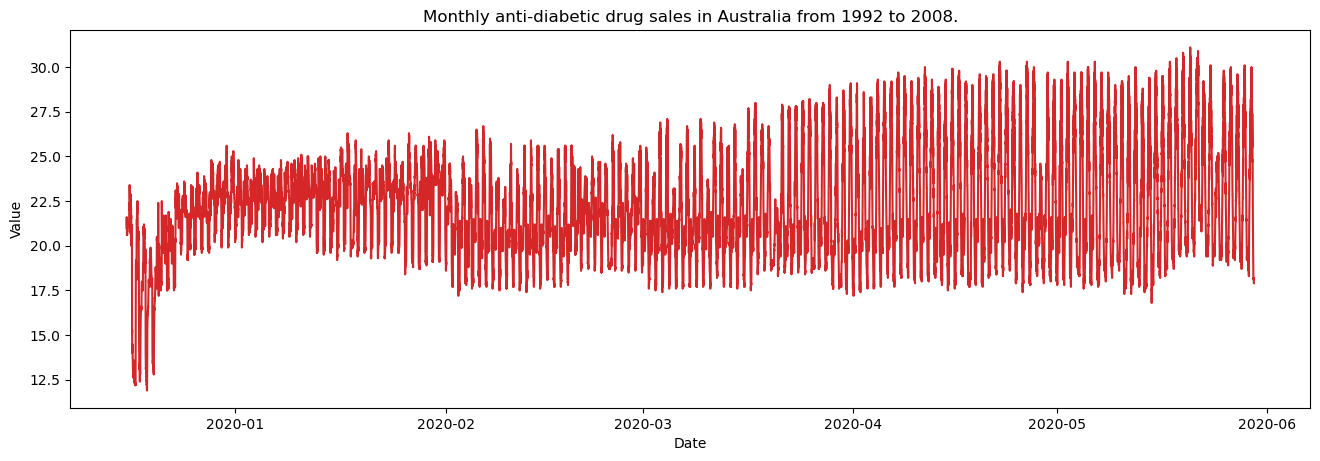

In [4]:


# transforming the excel time to normal time
def date_transformation(num):
    python_date = datetime(*xlrd.xldate_as_tuple(num, 0))
    return (python_date)


GreenhouseClimate['time'] = GreenhouseClimate['time'].apply(date_transformation)

# df = GreenhouseClimate[GreenhouseClimate['Tair'].notna()]

# setting the time column as the index 
df = GreenhouseClimate.set_index("time")

# Seperating the month and year for ease of visualization 
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] =  df.index.day

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
   

plot_df(df, x=df.index, y=df["Tair"], title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')


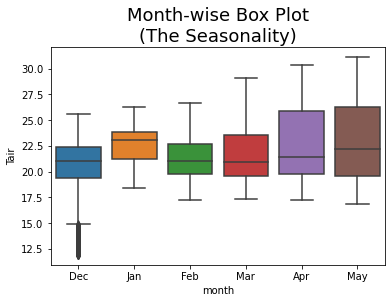

In [5]:
################################################################################
#Making the boxplot



months = df['month'].unique()
df.reset_index(inplace=True)
df['month'] = [d.strftime('%b') for d in df.time]



# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(months), replace=False)


fig, axes = plt.subplots()
sns.boxplot(x='month', y='Tair', data=df.loc[~df.year.isin([2018, 2021]), :])

# Set Title
# axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes.set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()



In [6]:
############################################################
# Downsampling 




downsample = df[[ 'time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
                 'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'assim_sp', 'assim_vip',
       'co2_dos', 'co2_sp', 'co2_vip', 'dx_sp', 'dx_vip', 'int_blue_sp',
       'int_blue_vip', 'int_farred_sp', 'int_farred_vip', 'int_red_sp',
       'int_red_vip', 'int_white_sp', 'int_white_vip', 'pH_drain_PC',
       'scr_blck_sp', 'scr_blck_vip', 'scr_enrg_sp', 'scr_enrg_vip',
       't_grow_min_sp', 't_grow_min_vip', 't_heat_sp', 't_heat_vip',
       't_rail_min_sp', 't_rail_min_vip', 't_vent_sp', 't_ventlee_vip',
       't_ventwind_vip', 'water_sup', 'water_sup_intervals_sp_min',
       'water_sup_intervals_vip_min', 'window_pos_lee_sp',
       'window_pos_lee_vip', 'year', 'month', 'day'
                ]].resample('1H', on='time').mean().reset_index(drop=False)

# df = downsample.copy()

downsample = downsample.fillna(method="ffill")
downsample = downsample.dropna(thresh=downsample.shape[0]*0.4,how='all',axis=1)
downsample = downsample.interpolate()

print(downsample.isnull().mean() * 100)
 

df = downsample 

time                           0.000000
AssimLight                     0.000000
BlackScr                       0.000000
CO2air                         0.000000
Cum_irr                        0.000000
EC_drain_PC                    0.000000
EnScr                          0.000000
HumDef                         0.000000
PipeGrow                       0.000000
PipeLow                        0.000000
Rhair                          0.000000
Tair                           0.000000
Tot_PAR                        0.000000
Tot_PAR_Lamps                  0.000000
VentLee                        0.000000
Ventwind                       0.000000
assim_sp                       0.451694
assim_vip                      0.000000
co2_dos                        0.000000
co2_sp                         0.451694
co2_vip                        0.000000
dx_sp                          0.451694
dx_vip                         0.000000
int_blue_sp                    0.000000
int_blue_vip                   0.225847


C:\Users\oluch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\oluch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\oluch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\oluch\anacond

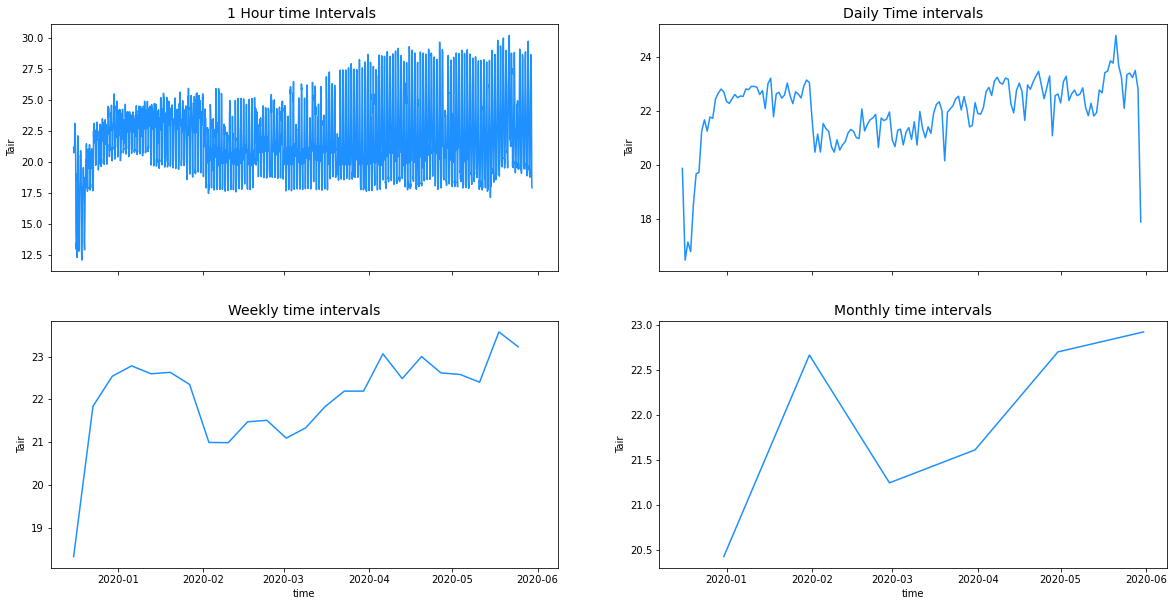

In [7]:
####################################################################
fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(20,10))

sns.lineplot(df['time'], df['Tair'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('1 Hour time Intervals ', fontsize=14)

resampled_df = df[['time','Tair']].resample('7D', on='time').mean().reset_index(drop=False)
sns.lineplot(resampled_df['time'], resampled_df['Tair'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly time intervals', fontsize=14)


resampled_df = df[['time','Tair']].resample('1D', on='time').mean().reset_index(drop=False)
sns.lineplot(resampled_df['time'], resampled_df['Tair'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Time intervals', fontsize=14)


resampled_df = df[['time','Tair']].resample('M', on='time').mean().reset_index(drop=False)
sns.lineplot(resampled_df['time'], resampled_df['Tair'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Monthly time intervals', fontsize=14)




    # ax[i, 1].set_xlim([time(2019, 1, 1), time(2020, 6, 30)])
plt.show()




In [8]:

# Checking for stationarity 


from statsmodels.tsa.stattools import adfuller

def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
    
    if result[1] > 0.05:
        print("Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary")


check_adfuller(df['Tair'].values)

Test statistic:  -5.343221123529049
p-value:  4.452810263688483e-06
Critical Values: {'1%': -3.4320045004616855, '5%': -2.862271067788467, '10%': -2.567159155560102}
Reject the null hypothesis (H0), the data does not have a unit root and is stationary


In [9]:
#############################################################################
# Building the model 

# Finding the best arima model Best model:  ARIMA(2,1,4)(0,0,0)[0]
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Tair'], trace=True,
suppress_warnings=True)

# Splitting the data
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9386.177, Time=3.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11590.048, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10152.613, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10401.543, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11588.050, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10147.506, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10139.429, Time=1.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10046.823, Time=3.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9868.800, Time=2.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10153.886, Time=0.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10111.993, Time=1.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10133.120, Time=1.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=9354.215, Time=4.92 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=9366.071, Time=4.63 sec
 ARIMA(3,1,4)(0,0,0)[0]

In [10]:
# Building the arima model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Tair'],order=(2,1,4))
model=model.fit()
model.summary()




C:\Users\oluch\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Tair   No. Observations:                 3954
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -4502.310
Method:                       css-mle   S.D. of innovations              0.755
Date:                Wed, 07 Jul 2021   AIC                           9020.619
Time:                        11:44:46   BIC                           9070.879
Sample:                             1   HQIC                          9038.445
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0005      0.004      0.133      0.894      -0.007       0.008
ar.L1.D.Tair     1.8933      0.006    326.972      0.000       1.882       1.905
ar.L2.D.Tair    -0.9616      0.006   -168.132      0.000      -0.973      -0.950
ma.L1.D.Tair    -1.5972      0.017    -93.844      0.000      -1.631      -1.564
ma.L2.D.Tair     0.3029      0.030     10.048      0.000       0.244       0.362
ma.L3.D.Tair     0.3470      0.031     11.207      0.000       0.286       0.408
ma.L4.D.Tair    -0.0304      0.017     -1.820      0.069      -0.063       0.002
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9845           -0.2659j            1.0198           -0.0420
AR.2            0.9845           +0.2659j            1.0198            0.0420
MA.1            1.0324           -0.1338j            1.0410           -0.0205
MA.2            1.0324           +0.1338j            1.0410            0.0205
MA.3           -2.5502           -0.0000j            2.5502           -0.5000
MA.4           11.8877           -0.0000j           11.8877           -0.0000
-----------------------------------------------------------------------------
"""

3955    25.461893
3956    23.945630
3957    22.508309
3958    21.221398
3959    20.166951
3960    19.408007
3961    18.985022
3962    18.913975
3963    19.186222
3964    19.770026
3965    20.613618
3966    21.649492
3967    22.799619
3968    23.981176
3969    25.112379
3970    26.118020
3971    26.934354
3972    27.512997
3973    27.823645
3974    27.855440
3975    27.616969
3976    27.134926
3977    26.451596
3978    25.621375
3979    24.706586
3980    23.772927
3981    22.884858
3982    22.101252
3983    21.471591
3984    21.032951
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

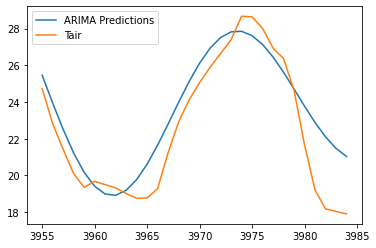

In [12]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)
pred.index = df.index[start:end+1]
pred.plot(legend=True)
test['Tair'].plot(legend=True)

In [17]:
# Checking Accuracy 



from sklearn.metrics import mean_squared_error
from math import sqrt
test['Tair'].mean()
rmse=sqrt(mean_squared_error(pred,test['Tair']))
print(rmse)

1.6493971446125957


In [20]:
test['Tair'].mean()


22.473611112249998

In [29]:
# Retraining on the entire dataset


model2 = ARIMA(df['Tair'], order=(2,1,4))
model2 = model2.fit()
df.tail()



,time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip,year,day
3980,2020-05-29 20:00:00,0.0,0.0,422.000000,4.68,6.747500,0.0,10.147500,0.0,0.0,...,18.0,18.433333,18.433333,39.0,289.999992,1440.0,0.0,0.0,2020,29
3981,2020-05-29 21:00:00,0.0,0.0,431.416667,4.68,6.820000,0.0,6.410000,0.0,0.0,...,18.0,18.000000,18.000000,39.0,289.999992,1440.0,0.0,0.0,2020,29
3982,2020-05-29 22:00:00,0.0,0.0,445.958333,4.68,6.825417,0.0,3.948333,0.0,0.0,...,18.0,18.000000,18.000000,39.0,289.999992,1440.0,0.0,0.0,2020,29
3983,2020-05-29 23:00:00,0.0,0.0,463.750000,4.68,6.843333,0.0,2.335833,0.0,0.0,...,18.0,18.000000,18.000000,39.0,1440.000000,1440.0,0.0,0.0,2020,29
3984,2020-05-30 00:00:00,0.0,0.0,463.750000,4.68,6.843333,0.0,2.335833,0.0,0.0,...,18.0,18.000000,18.000000,39.0,1440.000000,1440.0,0.0,0.0,2020,30


In [54]:
#Making a predection for the next 30 days 
index_future_dates = pd.date_range(start ="2020-05-30 00:00:00", end = "2020-05-31 00:00:00",  freq='1H')

pred = model2.predict(start=len(df["Tair"]), end =len(df["Tair"])+24,typ="levels").rename("ARIMA Predictions")
pred.index = index_future_dates

# print(pred.index)
print(pred)



2020-05-30 00:00:00    17.938359
2020-05-30 01:00:00    18.293571
2020-05-30 02:00:00    18.926761
2020-05-30 03:00:00    19.783200
2020-05-30 04:00:00    20.795896
2020-05-30 05:00:00    21.889731
2020-05-30 06:00:00    22.986908
2020-05-30 07:00:00    24.012365
2020-05-30 08:00:00    24.898797
2020-05-30 09:00:00    25.590959
2020-05-30 10:00:00    26.048982
2020-05-30 11:00:00    26.250507
2020-05-30 12:00:00    26.191549
2020-05-30 13:00:00    25.886068
2020-05-30 14:00:00    25.364333
2020-05-30 15:00:00    24.670230
2020-05-30 16:00:00    23.857749
2020-05-30 17:00:00    22.986911
2020-05-30 18:00:00    22.119434
2020-05-30 19:00:00    21.314460
2020-05-30 20:00:00    20.624605
2020-05-30 21:00:00    20.092621
2020-05-30 22:00:00    19.748844
2020-05-30 23:00:00    19.609601
2020-05-31 00:00:00    19.676625
Freq: H, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

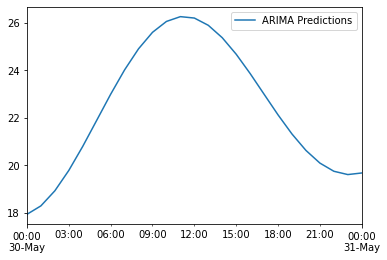

In [80]:
pred.plot(legend = True)

In [89]:
print("Confidence intervals for P=10")
print(model2.conf_int(0.90))
print("Confidence intervals for P=90")

print(model2.conf_int(0.1))


Confidence intervals for P=10
                     0         1
const        -0.000327  0.000663
ar.L1.D.Tair  1.892889  1.894319
ar.L2.D.Tair -0.962618 -0.961207
ma.L1.D.Tair -1.598516 -1.594261
ma.L2.D.Tair  0.297586  0.305125
ma.L3.D.Tair  0.343756  0.351505
ma.L4.D.Tair -0.032213 -0.028023
Confidence intervals for P=90
                     0         1
const        -0.006310  0.006647
ar.L1.D.Tair  1.884242  1.902966
ar.L2.D.Tair -0.971147 -0.952678
ma.L1.D.Tair -1.624238 -1.568540
ma.L2.D.Tair  0.252019  0.350692
ma.L3.D.Tair  0.296919  0.398342
ma.L4.D.Tair -0.057541 -0.002694


In [94]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Tair'],order=(2,1,1))
model_fit = model.fit(disp=0)
forecast,stderr,conf_int = model_fit.forecast(27,alpha=0.05)

print(conf_int)

C:\Users\oluch\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


[[16.80624971 19.99479855]
 [16.35247374 22.10820752]
 [16.27003336 24.06928388]
 [16.44188004 25.70556282]
 [16.74845092 26.96915355]
 [17.09196851 27.88230214]
 [17.40488443 28.50078214]
 [17.64960716 28.89023936]
 [17.81346334 29.11245367]
 [17.90139618 29.21900898]
 [17.92834444 29.24986827]
 [17.91278194 29.2345394 ]
 [17.87223293 29.19410628]
 [17.82085447 29.14317637]
 [17.76866699 29.09143035]
 [17.72182794 29.04480047]
 [17.68340412 29.00639934]
 [17.65426537 28.97729413]
 [17.6338913  28.95716726]
 [17.62100669 28.94486843]
 [17.6140351  28.93885086]
 [17.61139446 28.9374892 ]
 [17.61166984 28.93928689]
 [17.61369729 28.94299023]
 [17.61658726 28.94763116]
 [17.61971008 28.95252134]
 [17.6226601  28.95721724]]


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).